In [2]:
import matplotlib.pyplot as p
import numpy as np
import hyperspy.api as hs
import atomap.api as am
import pathlib as Path

C:\Users\4DSTEM\anaconda3\lib\site-packages\pyUSID\viz\__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [3]:
path = "Datos/4DSTEM/02 SI data_20cm_CL1-2/pixstem_2alpha/"

s = hs.load(path+"s_adf_IFFT.tif")

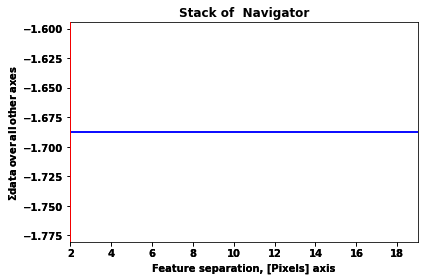

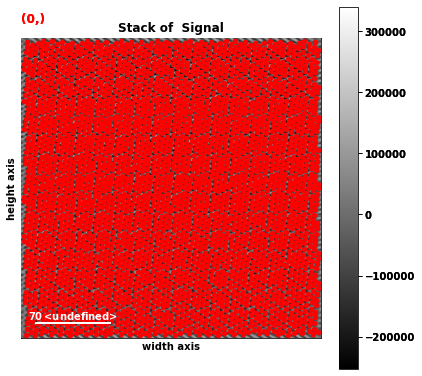

In [4]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20), show_progressbar=False)
s_peaks.plot()

In [5]:
atom_positions = am.get_atom_positions(s, separation=3)

In [6]:
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:3213,planes:0)>

In [7]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/3213 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/3213 [00:00<?, ?it/s]

  0%|          | 0/3213 [00:00<?, ?it/s]

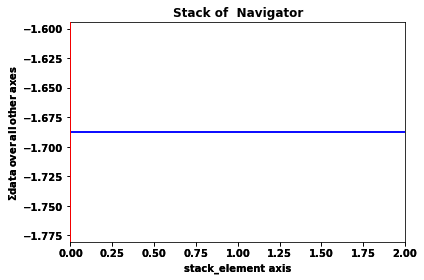

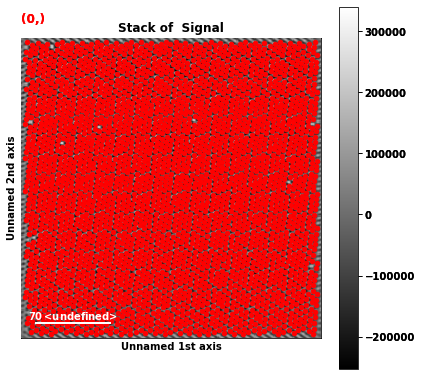

In [8]:
sublattice.get_position_history().plot()

In [9]:
atom_list = sublattice.atom_list

In [10]:
sublattice.construct_zone_axes()
sublattice

<Sublattice,  (atoms:3213,planes:6)>

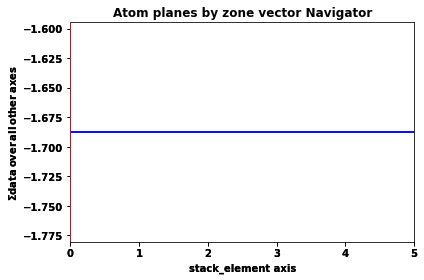

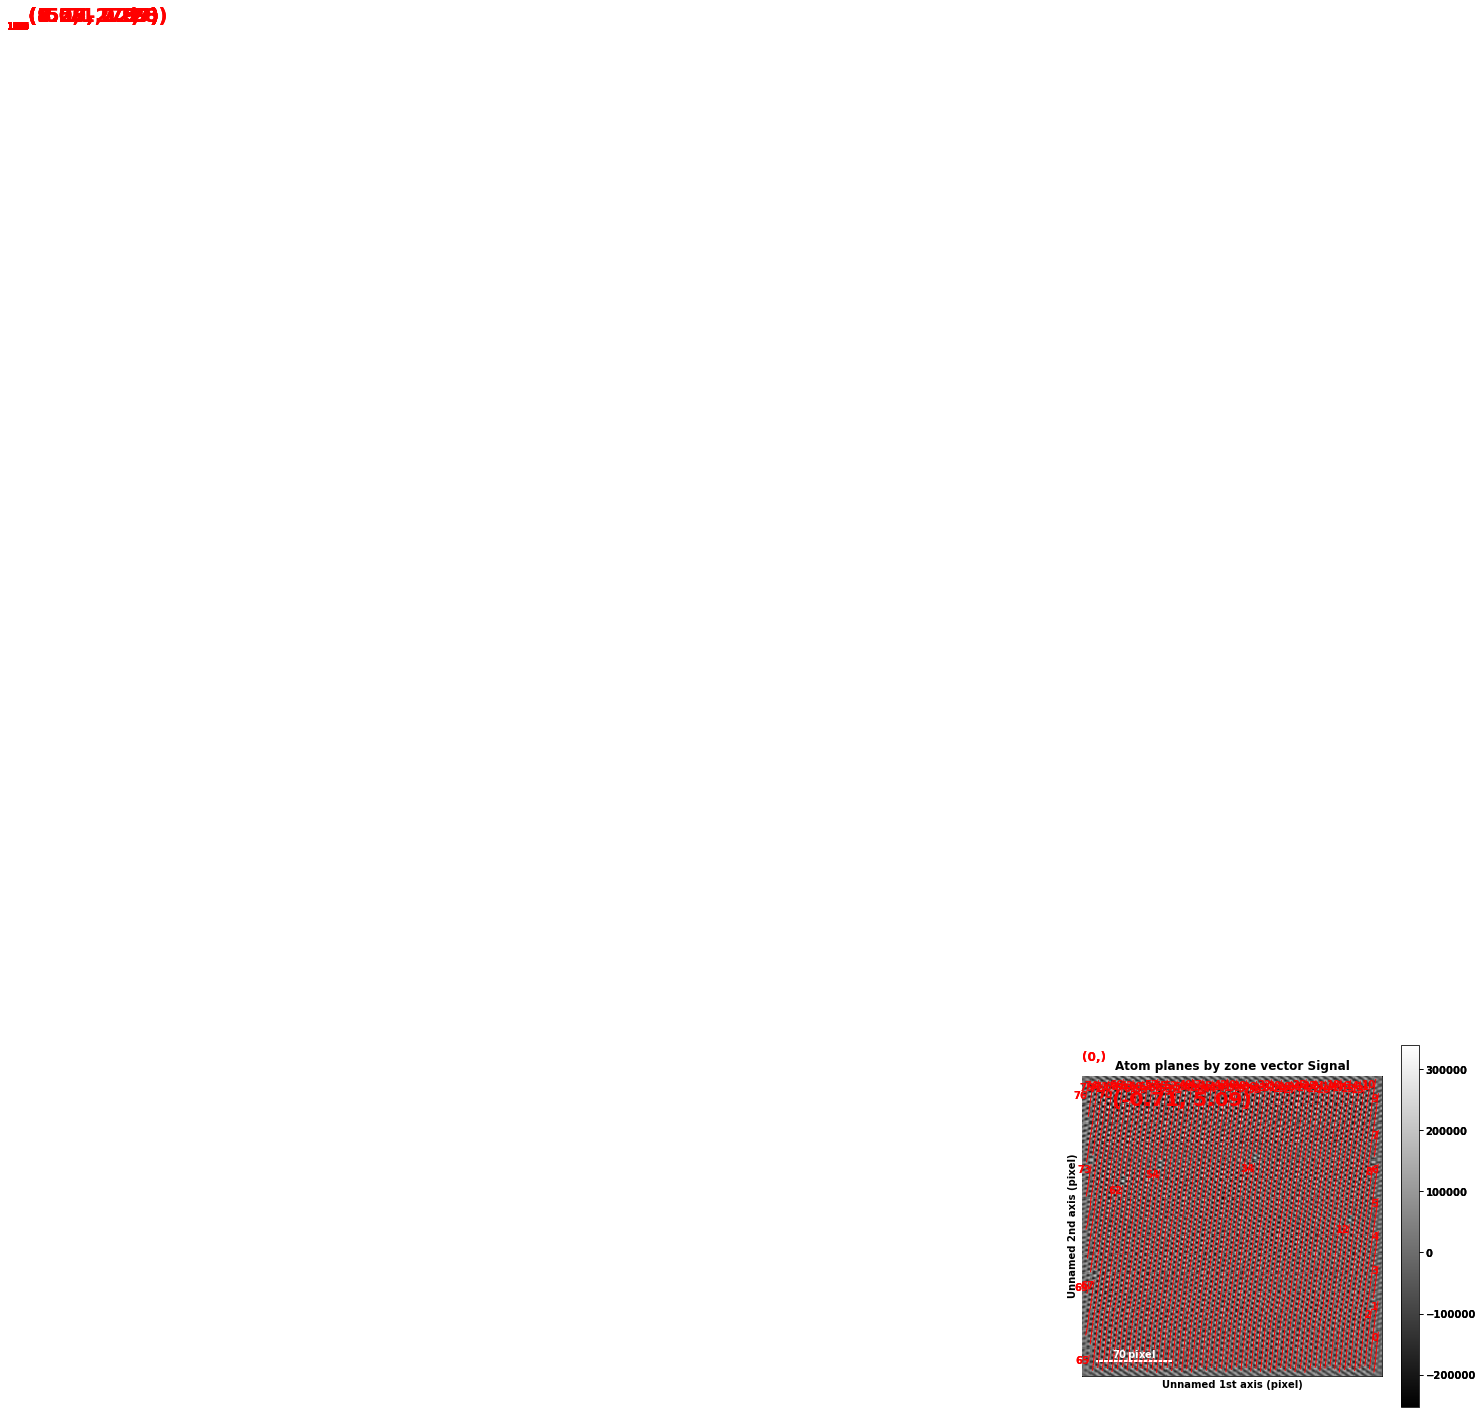

In [34]:
sublattice.plot_planes()

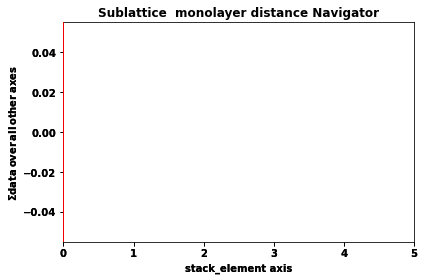

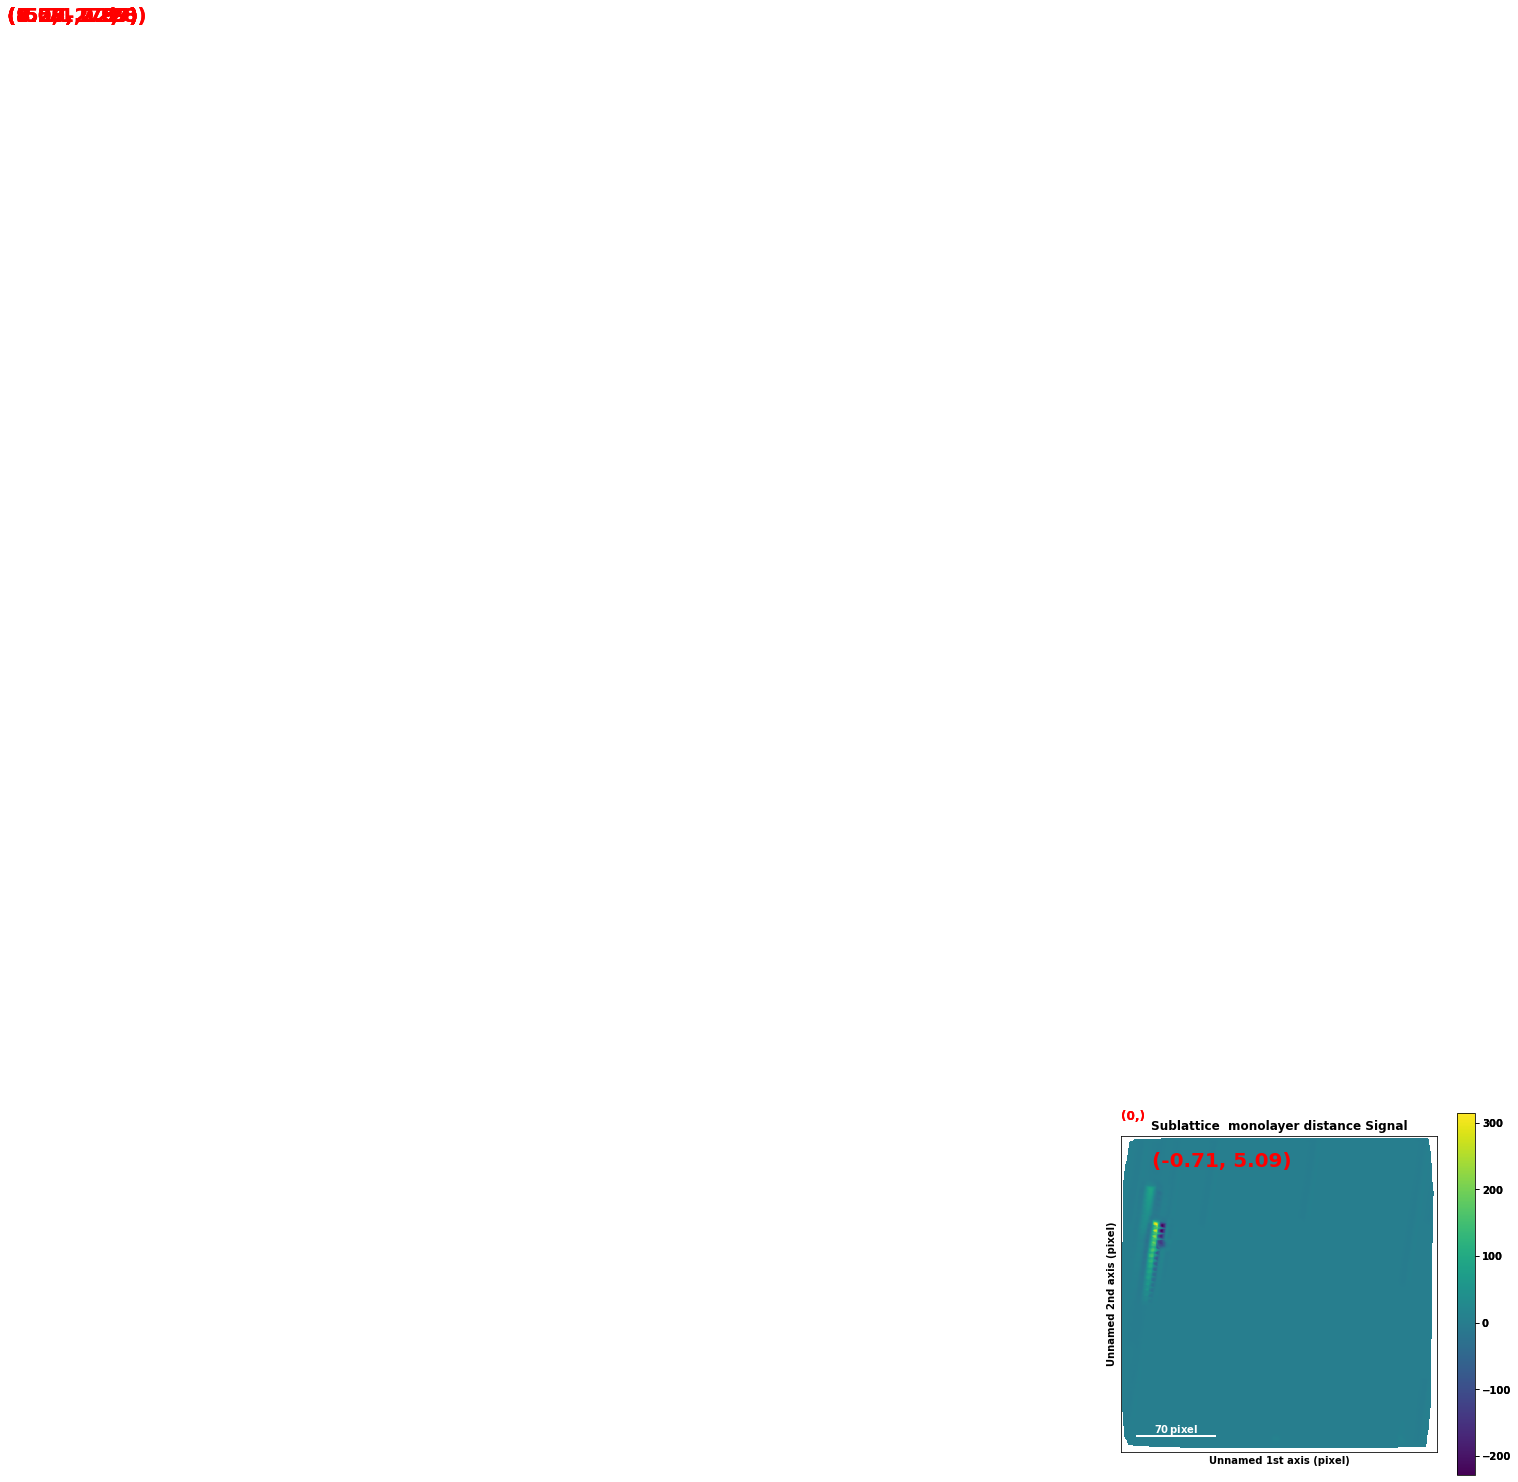

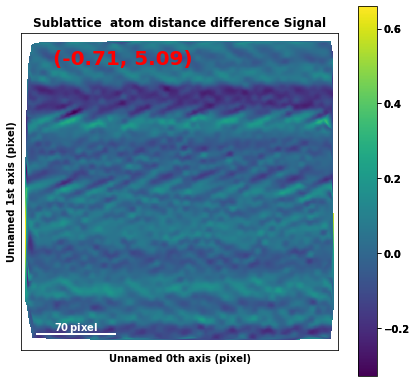

In [43]:
s_monolayer = sublattice.get_monolayer_distance_map()
s_monolayer.plot(cmap='viridis')
zone = sublattice.zones_axis_average_distances[0]
s_dd = sublattice.get_atom_distance_difference_map([zone])
s_dd.plot(cmap='viridis')